# London underground hourly exits data analysis

by **Bradley Aldous**

## Contents:

* [Part 1: Calculating Morning and Evening Peak Proportions](#first-bullet)
* [Part 2: Plotting and Analysing Distributions](#second-bullet)
* [Part 3: A Simple Classification of Stations](#third-bullet)

## Part 1: Calculating Morning and Evening Peak Proportions <a class="anchor" id="first-bullet"></a>

The 'hourlyExits' dataset containing the number of exits from each station on the London underground network is stored in a new data frame called 'exits'.

In [1]:
import pandas as pd

exits = pd.read_csv('hourlyExits.csv', index_col='Station')

The hours included within the AM peak and PM peak periods are 7am, 8am & 9am and 4pm, 5pm & 6pm respectively, and so the number of exits from each station corresponding to each of these hours is stored in the relevant variable; either 'AMPeak' or 'PMPeak', depending on which period they fall in.

In [2]:
AMPeak = exits.loc[:, ('H07', 'H08', 'H09')]
PMPeak = exits.loc[:, ('H16', 'H17', 'H18')]

A new empty data frame called 'peak_counts' is created, and the total number of exits from each station in the AM peak period is summed, as well as for the PM peak period. These summed values are then stored in the new variables, 'AMPeak_Count' and 'PMPeak_Count', which are then assigned to the data frame to create the above dataset. Thus, this new data frame contains the total number of exits in the AM and PM peak periods for each station.

In [3]:
peak_counts = pd.DataFrame()
peak_counts = peak_counts.assign(AMPeak_Count = AMPeak['H07'] + AMPeak['H08'] + AMPeak['H09'], PMPeak_Count = PMPeak['H16'] + PMPeak['H17'] + PMPeak['H18'])
peak_counts

,AMPeak_Count,PMPeak_Count
Station,,
Acton Town,1970,2628
Aldgate,7408,2992
Aldgate East,7618,3803
Alperton,856,1847
Amersham,424,1465
...,...,...
Wimbledon Park,497,1114
Wood Green,2165,6494
Wood Lane,1798,1766


A new variable called 'Daily_total' is created by summing the total number of exits from each station in the 'exits' data frame. This variable contains the total number of exits for each station in the full 24 hour period, not just the AM and PM peak periods.

In [4]:
Daily_total = exits.sum(axis = 1)

A new data frame called 'peak_proportions' is created. The values in the 'AMPeak_Count' column in 'peak_counts' is then divided by 'Daily_total' to then create a new column in 'peak_proportions' called 'Proportion_of_AMPeak'. The same calculation is done on the 'PMPeak_Count' column and then stored in 'peak_proportions' as 'Proportion_of_PMPeak'. Thus, this new data frame contains the AM and PM peak counts of total exits as a proportion of the daily total for each station.

In [5]:
peak_proportions = pd.DataFrame()
peak_proportions['Proportion_of_AMPeak'] = peak_counts.AMPeak_Count / Daily_total
peak_proportions['Proportion_of_PMPeak'] = peak_counts.PMPeak_Count / Daily_total
peak_proportions

,Proportion_of_AMPeak,Proportion_of_PMPeak
Station,,
Acton Town,0.210425,0.280709
Aldgate,0.459098,0.185424
Aldgate East,0.359238,0.179336
Alperton,0.167253,0.360883
Amersham,0.108579,0.375160
...,...,...
Wimbledon Park,0.150789,0.337985
Wood Green,0.114013,0.341987
Wood Lane,0.272012,0.267171


## Part 2: Plotting and Analysing Distributions <a class="anchor" id="second-bullet"></a>

The describe function provides us with extra insight into the data, giving useful values for the distributions ('peak_counts' and 'peak_proportions'), like the mean, median, standard deviation and quartiles.

In [6]:
peak_counts.describe()

,AMPeak_Count,PMPeak_Count
count,268.000000,268.000000
mean,4549.768657,4477.555970
std,8181.784059,6276.463316
min,27.000000,239.000000
25%,677.500000,1471.750000
50%,1517.000000,2622.000000
75%,4315.250000,4707.750000
max,61116.000000,59486.000000


In [7]:
peak_proportions.describe()

,Proportion_of_AMPeak,Proportion_of_PMPeak
count,268.000000,268.000000
mean,0.207132,0.298750
std,0.122161,0.087724
min,0.045302,0.084630
25%,0.116120,0.240947
50%,0.169378,0.307397
75%,0.266443,0.361596
max,0.630427,0.496079


Two histograms are created; one for the 'Proportion_of_AMPeak' column in the 'peak_proportions' dataframe, and one for the 'Proportion_of_PMPeak' column.

Text(0, 0.5, 'Number of stations')

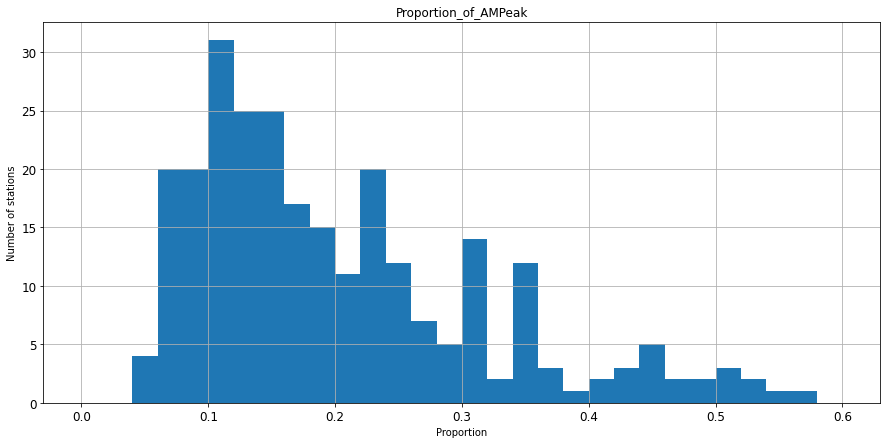

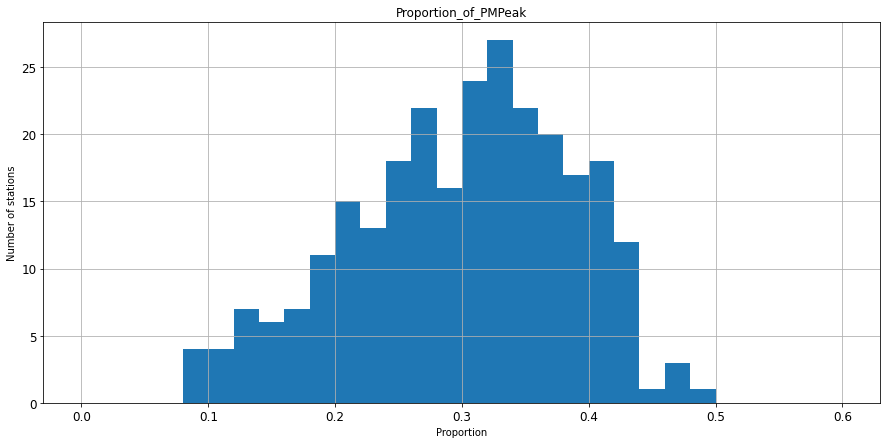

In [8]:
import matplotlib.pyplot as plt

peak_proportions.hist(column = 'Proportion_of_AMPeak', bins = 30, figsize = (15,7), xlabelsize = 12, ylabelsize = 12, range = [0,0.6])
plt.xlabel('Proportion')
plt.ylabel('Number of stations')
peak_proportions.hist(column = 'Proportion_of_PMPeak', bins = 30, figsize = (15,7), xlabelsize = 12, ylabelsize = 12, range = [0,0.6])
plt.xlabel('Proportion')
plt.ylabel('Number of stations')

Whilst the ranges of the distributions are comparable, the median is significantly lower in the AM peak than the PM peak in both of the above distributions. In the AM peak proportion distribution we can see that the median is roughly a quarter of the maximum value, implying a positive skew. In fact, this is verified by the AM peak histogram. The two histograms display opposing skews; the AM peak histogram has a strongly positive skew, whilst the PM peak histogram has a very slight negative skew (almost symmetrical). The positive skew of the AM peak histogram suggests that there may be a higher number of stations in the dataset that are situated in more residential areas, rather than in business districts, as there are less stations with more people exiting in the AM than the PM peak period.

From the statistics shown by applying the describe function, we see that the ranges for the AM peak period in each distribution above is greater than the range for the PM peak period. This is made evident further by making a comparison between the standard deviations of the peak periods. We see that, in both the sum and proportion cases, the standard deviation is greater in the AM period than the PM period. This suggests that the spread of proportions for the AM peak is greater than the PM peak. This could mean that the times at which people travel in the AM period is less spread out than in the PM period.

Whilst the standard deviation is greater in the AM peak case, the histogram shows us that the bulk of the data is more tightly concentrated in the low proportions (higher proportions have very low values for the number of stations). In the PM peak case, the data seems to less constrained and evenly spread out, despite its lower standard deviation.

## Part 3: A Simple Classification of Stations <a class="anchor" id="third-bullet"></a>

To separate the stations into three classes ('Work', 'Residential' and 'Other'), a suitable threshold is chosen to allow a distinction between the stations. Here, this threshold is chosen to be a ratio of the variables 'Proportion_of_AMPeak' and 'Proportion_of_PMPeak'. For a station to be in the 'Work' class, the AM peak proportion must be greater than twice the PM peak proportion (2:1 ratio). In the case of the 'Residential' class, this is reversed; the PM peak proportion is greater than twice the AM peak proportion. Any stations that do not satisfy either of the above criteria are classed as 'Other'.

In [9]:
def stationClass(row):
    if (row.Proportion_of_AMPeak / row.Proportion_of_PMPeak) > 2 : return 'Work'
    if (row.Proportion_of_PMPeak / row.Proportion_of_AMPeak) > 2 : return 'Residential'
    return 'Other'

A new column 'Class' is then added to the data frame 'peak_proportions' containing the class that each station belongs to, as determined by the above criteria.

In [10]:
peak_proportions = peak_proportions.assign(Class = peak_proportions.apply(stationClass, axis = 1))
peak_proportions

,Proportion_of_AMPeak,Proportion_of_PMPeak,Class
Station,,,
Acton Town,0.210425,0.280709,Other
Aldgate,0.459098,0.185424,Work
Aldgate East,0.359238,0.179336,Work
Alperton,0.167253,0.360883,Residential
Amersham,0.108579,0.375160,Residential
...,...,...,...
Wimbledon Park,0.150789,0.337985,Residential
Wood Green,0.114013,0.341987,Residential
Wood Lane,0.272012,0.267171,Other


A selection of eleven Northern line stations is selected from 'peak_proportions' and displayed below.

In [11]:
peak_proportions.loc[['Archway', 'Balham', 'Embankment', 'Goodge Street', 'Highgate', 'High Barnet','Leicester Square',
                      'Morden', 'South Wimbledon', 'Tottenham Court Road', 'Warren Street']]

,Proportion_of_AMPeak,Proportion_of_PMPeak,Class
Station,,,
Archway,0.157158,0.294654,Other
Balham,0.119170,0.345038,Residential
Embankment,0.316509,0.261360,Other
Goodge Street,0.419287,0.152064,Work
Highgate,0.100101,0.355341,Residential
High Barnet,0.144235,0.345170,Residential
Leicester Square,0.187390,0.270347,Other
Morden,0.098852,0.379783,Residential
South Wimbledon,0.185494,0.305405,Other


'Balham', 'Highgate', 'High Barnet' and 'Morden' all belong to the 'Residential' class, which is expected as these stations are more towards the outer edge of London, and so would likely be significantly more residential than industrial/commercial.

'Goodge Street' and 'Warren Street' are classed as 'Work', which is expected as the area they are in is not very residential. The stations are surrounded by shops and businesses, as well as being situated right by University College London. Students typically follow standard working hours as well, so this will bolster the AM peak count further.

The 'Other' class is slightly more difficult to explain. 'Archway' seems like it should be a residential station, in fact it just narrowly misses being classed as 'Residential' (as decided by the above threshold). However, what sets it apart from stations like 'Highgate' is its proximity to Whittington Hospital. People have appointments at all times of day at a hospital, which explains why the proportions are tipped out of the 'Residential' class.

The remaining stations ('Embankment', 'Leicester Square', 'South Wimbledon' and 'Tottenham Court Road') are all either based in areas that have either an abundance of shops or have heavy tourism. All of these stations, apart from 'South Wimbledon', are very central and are popular areas for tourism. 'South Wimbledon' is not so much of a tourist hotspot as it is a shopping hotspot; this area has high streets, a shopping centre and cinemas. Tourists and shoppers do not necessarily travel more during the AM or PM peak periods; they travel at all times of day and so the proportions will be more even in these kinds of areas.